In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from myPDS import compute_and_plot_fft, LowPassFIR


In [8]:
data = np.genfromtxt('system3_data.csv', delimiter=',')

millis = data[:,0]
setpoint = data[:,1]
sig_raw = data[:,2]
sig_filtered = data[:,3]

N = sig_raw.size
Fs = 5.0


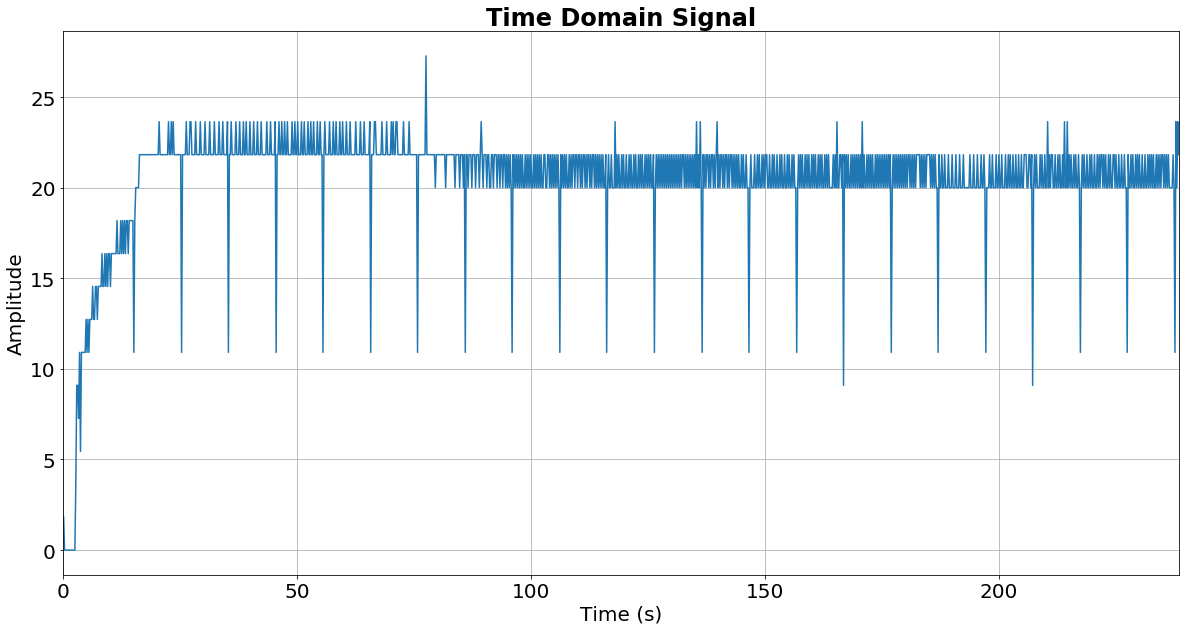

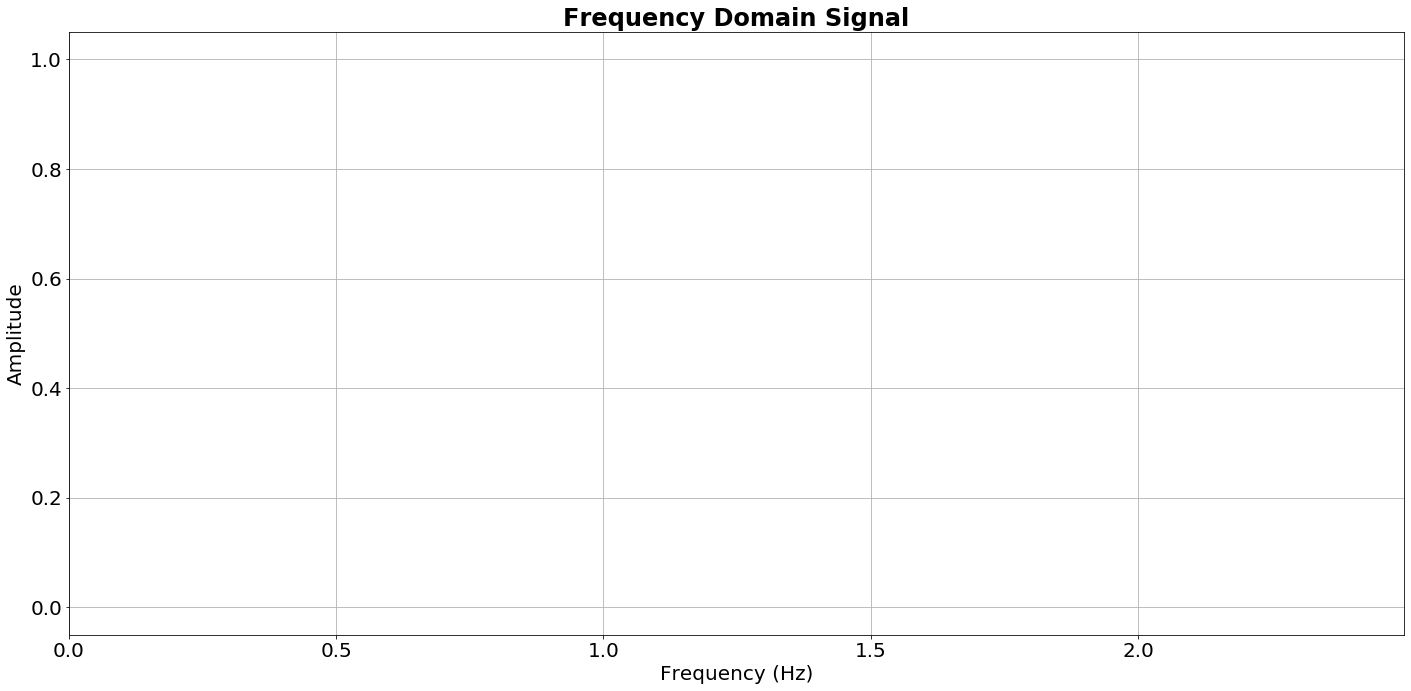

array([nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj])

In [9]:
compute_and_plot_fft(sig_raw, Fs)

In [10]:
fir_lp = LowPassFIR(fc=0.07, transition_width=0.5, stopband_attenuation=50, passband_ripple=0.1, Fs=Fs)
b = fir_lp.getFilterCoeffs()


hamming


/tmp/ipykernel_5536/644421742.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(b.T)
/home/senai/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


33

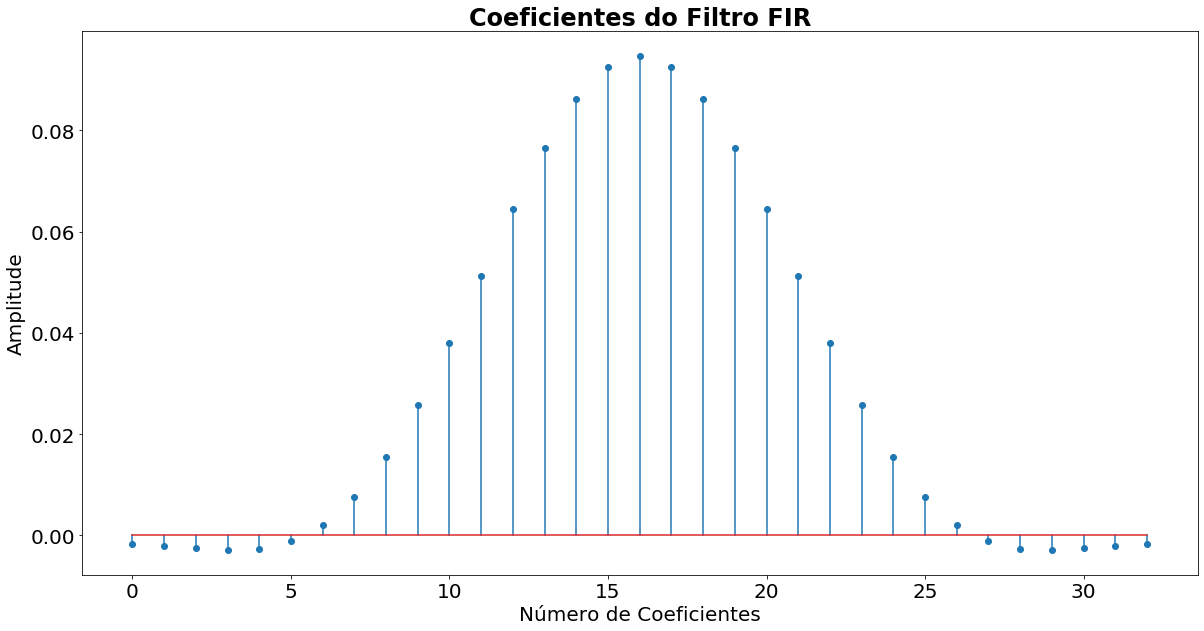

In [11]:
plt.figure(1, figsize=(20,10))
plt.title("Coeficientes do Filtro FIR", fontweight="bold")
plt.xlabel("Número de Coeficientes")
plt.ylabel("Amplitude")
plt.stem(b.T)
print(fir_lp.getWindow())
b.size

In [12]:
sig_raw = sig_raw.reshape(sig_raw.size)
b = b.reshape(b.size)

y = np.convolve(sig_raw, b)


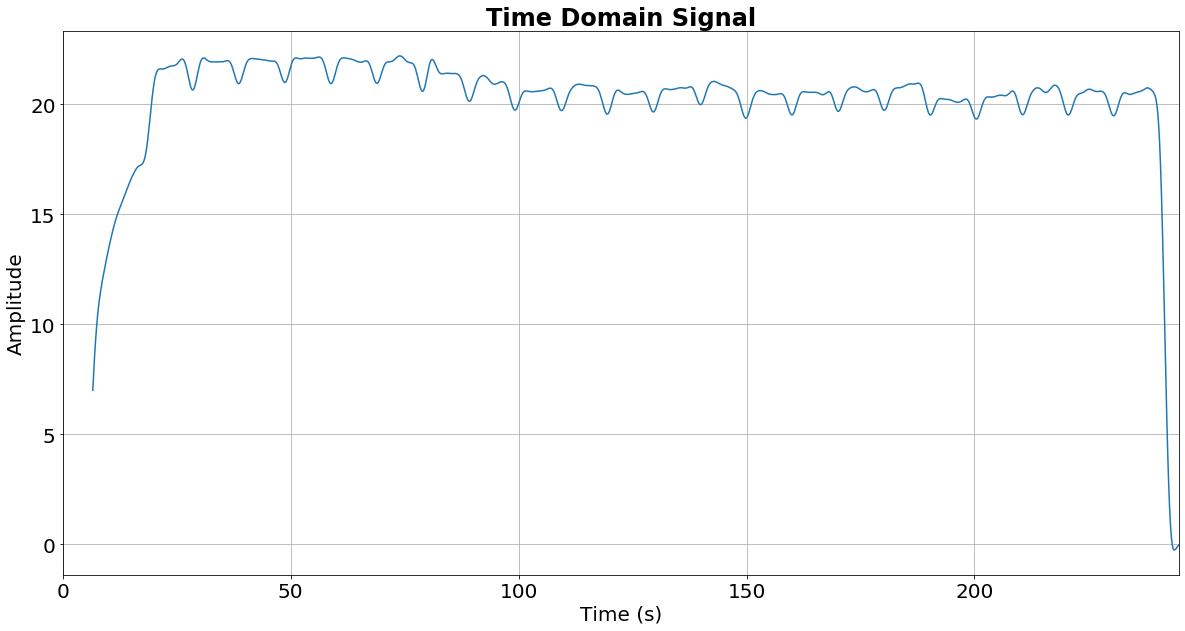

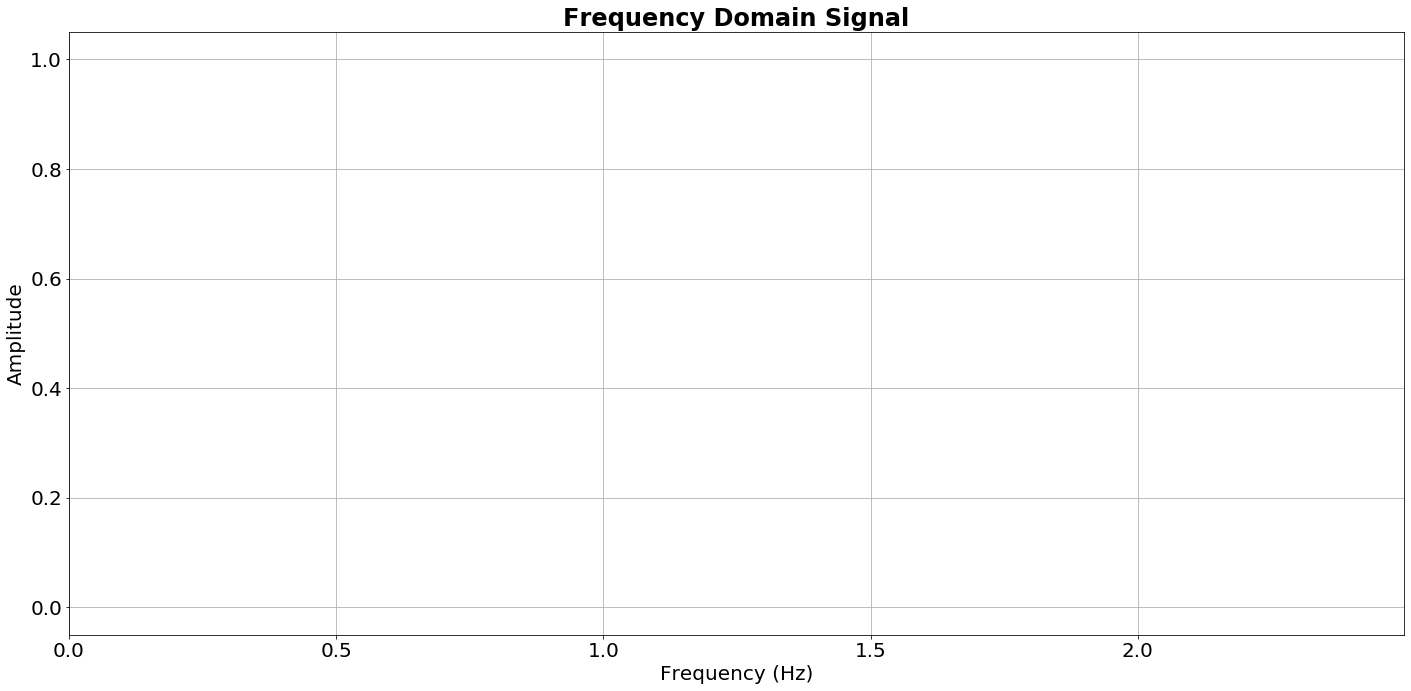

array([nan +0.j, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj])

In [13]:
compute_and_plot_fft(y, Fs)

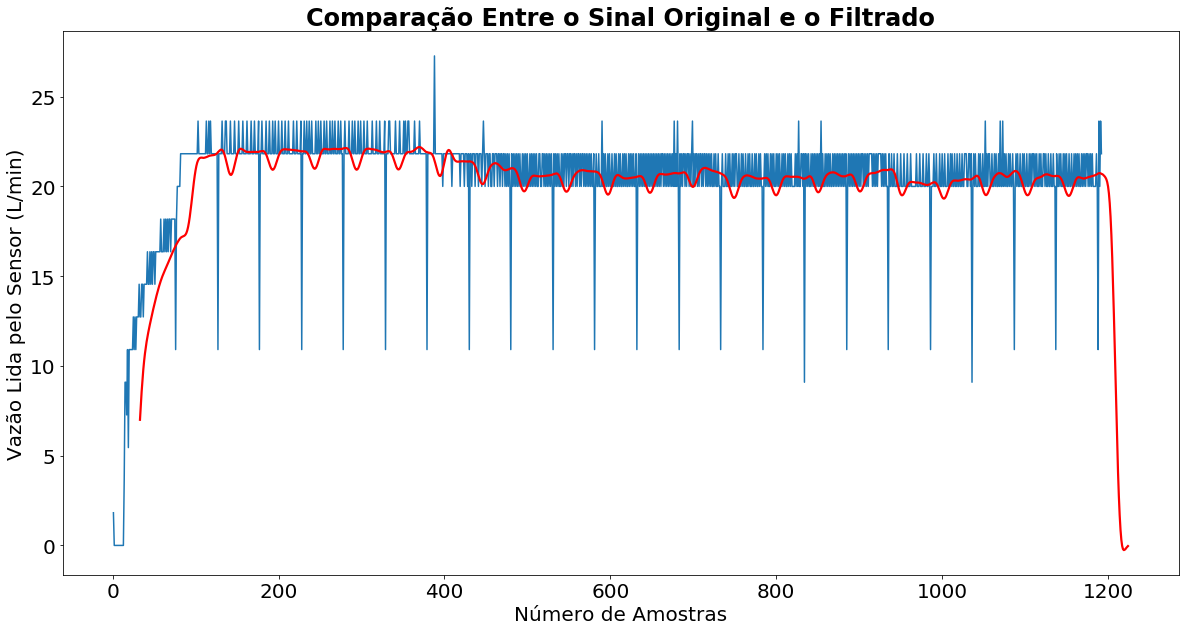

In [14]:
plt.figure(1, figsize=(20,10))
plt.title("Comparação Entre o Sinal Original e o Filtrado", fontweight="bold")
plt.xlabel("Número de Amostras")
plt.ylabel("Vazão Lida pelo Sensor (L/min)")
plt.plot(sig_raw)
plt.plot(y, color='r', linewidth = 2.2)

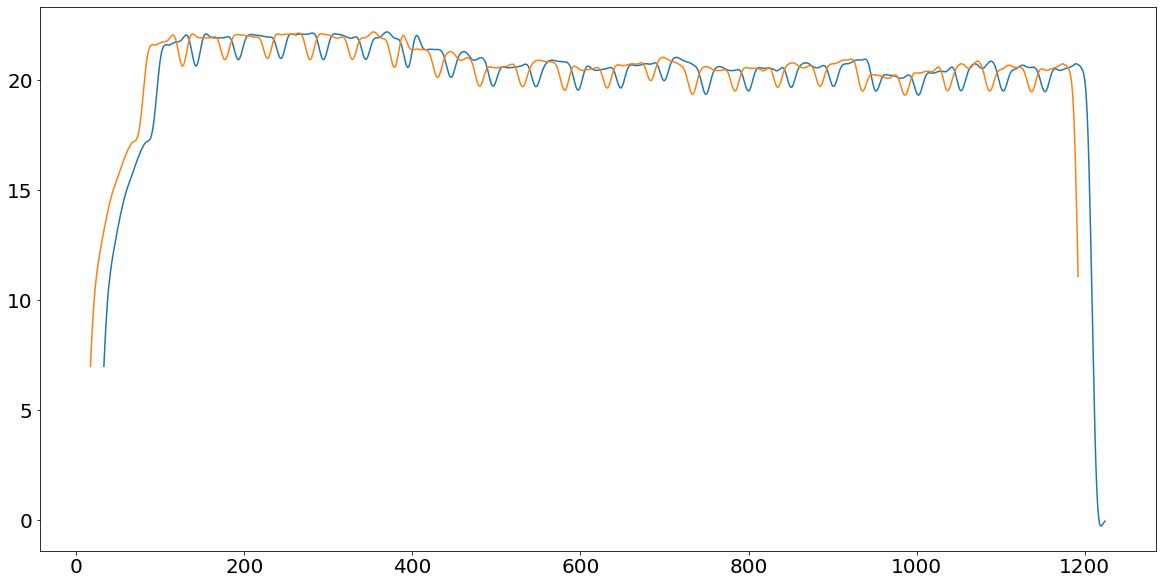

In [15]:
y1 = y[int(b.size/2):-int(b.size/2)]
plt.figure(1, figsize=(20,10))
plt.plot(y)
plt.plot(y1)

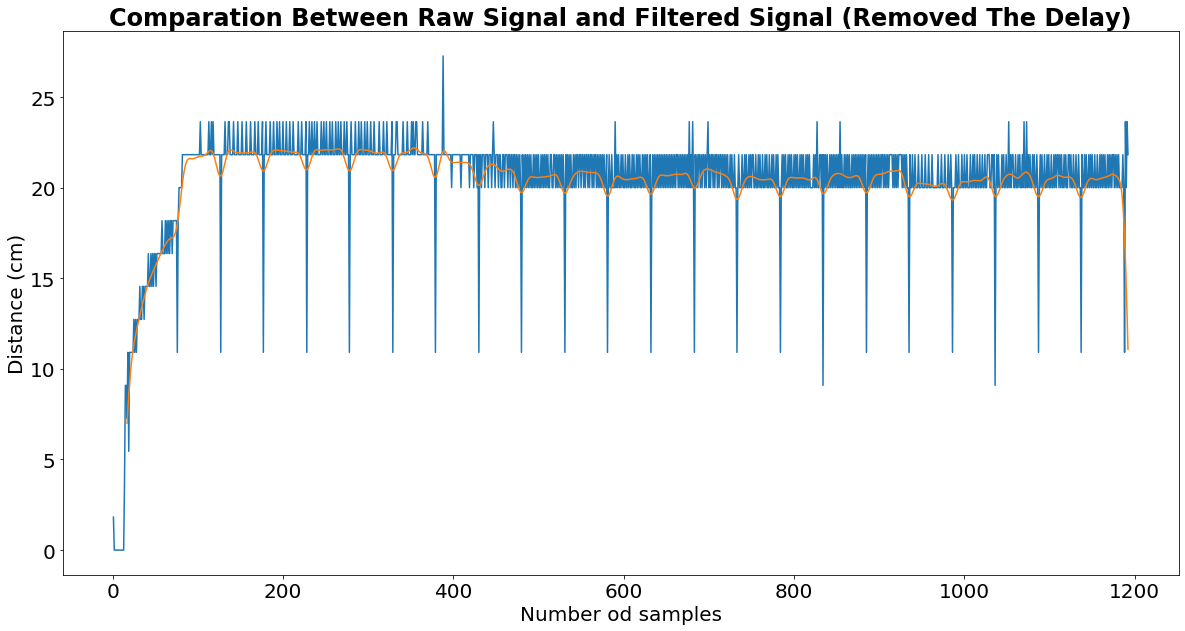

In [16]:
plt.figure(1, figsize=(20,10))
plt.title("Comparation Between Raw Signal and Filtered Signal (Removed The Delay)", fontweight="bold")
plt.xlabel("Number od samples")
plt.ylabel("Distance (cm)")
plt.plot(sig_raw)
plt.plot(y1)

In [17]:
from os.path import isfile
from os import remove

if isfile("filter_coeffs.txt"):
  remove("filter_coeffs.txt")

with open("filter_coeffs.txt", "a") as file:
  for coeff in b:
    file.write(str(coeff)+'\n')
  file.close()



In [18]:
max(y)

nan

In [19]:
wf, hf = freqz(b.T, 1, worN=1024, fs=Fs)


Text(0.5, 1.0, 'Frequency Response')

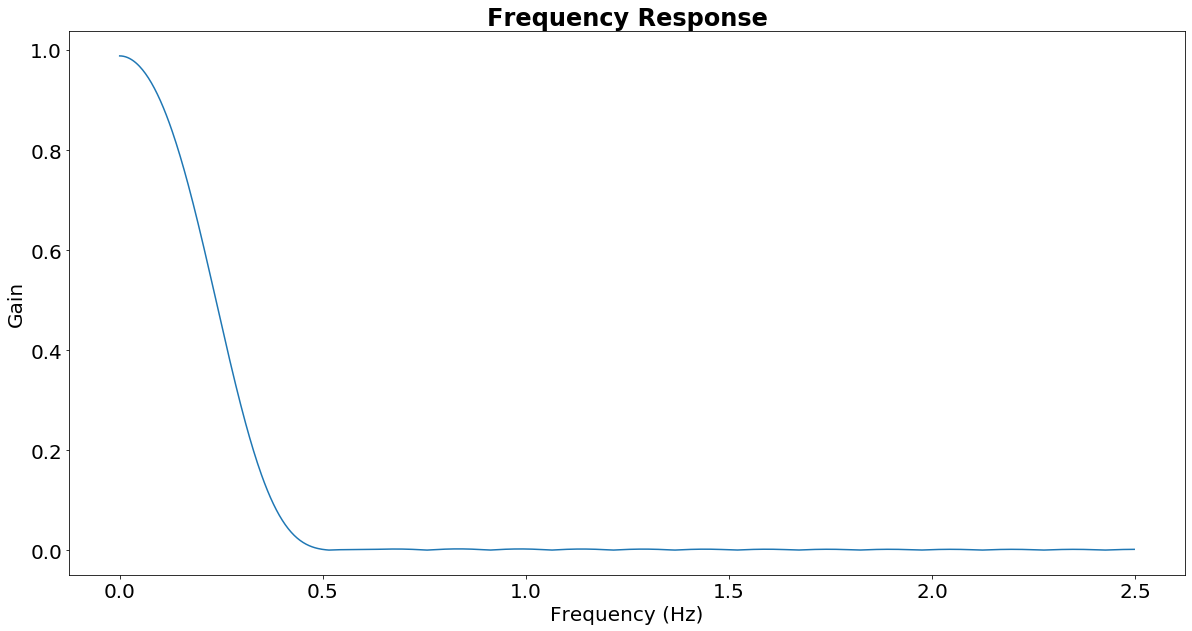

In [20]:
plt.figure(1, figsize=(20,10))
plt.plot(wf, np.absolute(hf))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.title("Frequency Response", fontweight="bold")


Text(0.5, 1.0, 'Resposta em Frequência do Filtro')

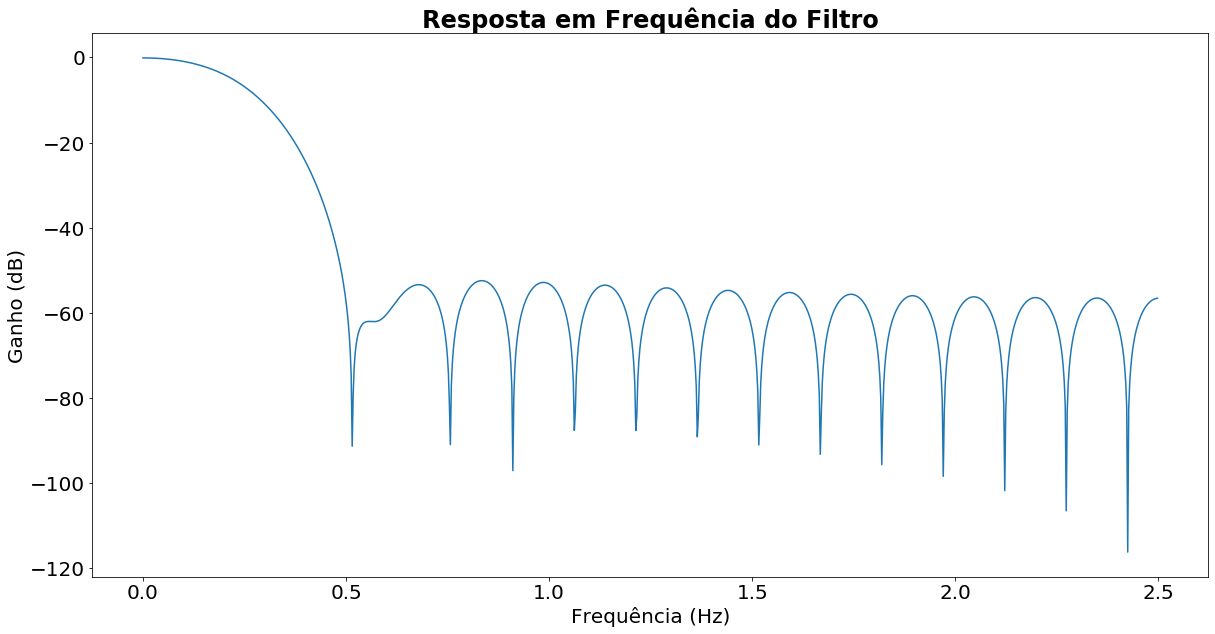

In [21]:
# Plotagem em dB
plt.figure(1, figsize=(20,10))
plt.plot(wf, 20*np.log10(np.absolute(hf)))
plt.xlabel("Frequência (Hz)")
plt.ylabel("Ganho (dB)")
plt.title("Resposta em Frequência do Filtro", fontweight="bold")